In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import REG_helper

In [5]:
(train_data, train_labels) , (test_data, test_labels) = mnist.load_data()
train_morpho_original = pd.read_csv("drive/MyDrive/train-morpho.csv")
test_morpho_original = pd.read_csv("drive/MyDrive/t10k-morpho.csv")

11490434/11490434 [==============================] - 0s 0us/step


#EDA

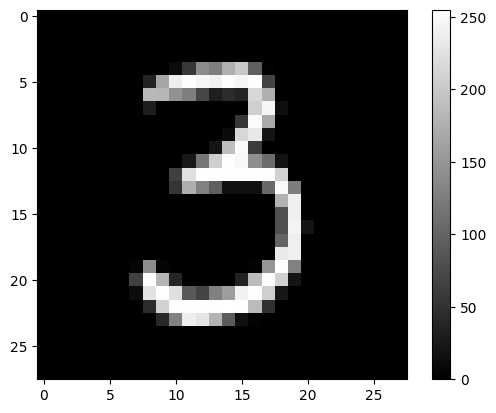

In [3]:
plt.imshow(train_data[50], cmap="gray")
plt.colorbar()
plt.show()

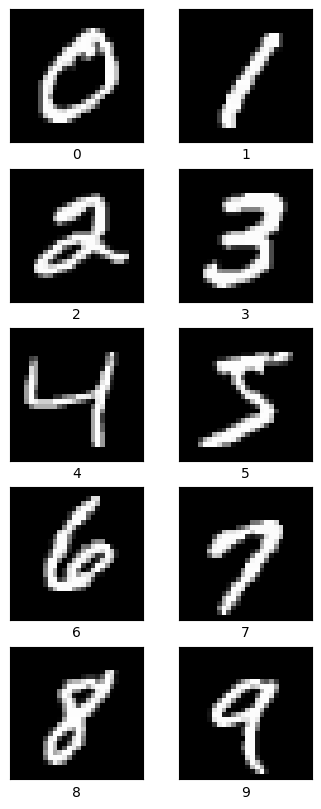

In [61]:
plt.figure(figsize=(4,10))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_data[train_labels==i][0], cmap="gray")
    plt.xlabel(str(i))
plt.show()

Text(0.5, 1.0, 'Train Composition')

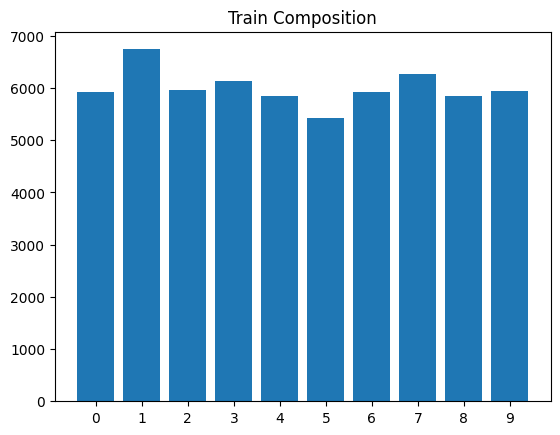

In [5]:
count=[np.count_nonzero(train_labels==value) for value in range(10)]
plt.bar(range(10), count)
plt.xticks(range(10))
plt.title('Train Composition')

In [6]:
print(train_morpho_original)

       index      area     length  thickness     slant      width     height
0          0  107.3125  50.266504   2.460658  0.231074  14.539572  19.849054
1          1  123.2500  51.198485   2.616601  0.331858  15.387810  19.341053
2          2   78.3750  45.927670   1.891592 -0.212196  20.479656  19.114880
3          3   67.3125  22.849242   2.919769  0.509185   5.358179  19.724599
4          4   91.1875  46.284271   2.247425  0.007590  13.275437  19.527523
...      ...       ...        ...        ...       ...        ...        ...
59995  59995  102.1875  61.415999   1.941380  0.366472  11.840672  19.937599
59996  59996  108.5625  46.705844   2.538071  0.364359  13.325950  19.688557
59997  59997   87.0625  44.523864   2.058077  0.257784  14.133500  20.070647
59998  59998   82.2500  53.337572   1.667193  0.310377  15.251961  19.692976
59999  59999   84.7500  56.966252   1.759232  0.588772  13.415460  17.869924

[60000 rows x 7 columns]


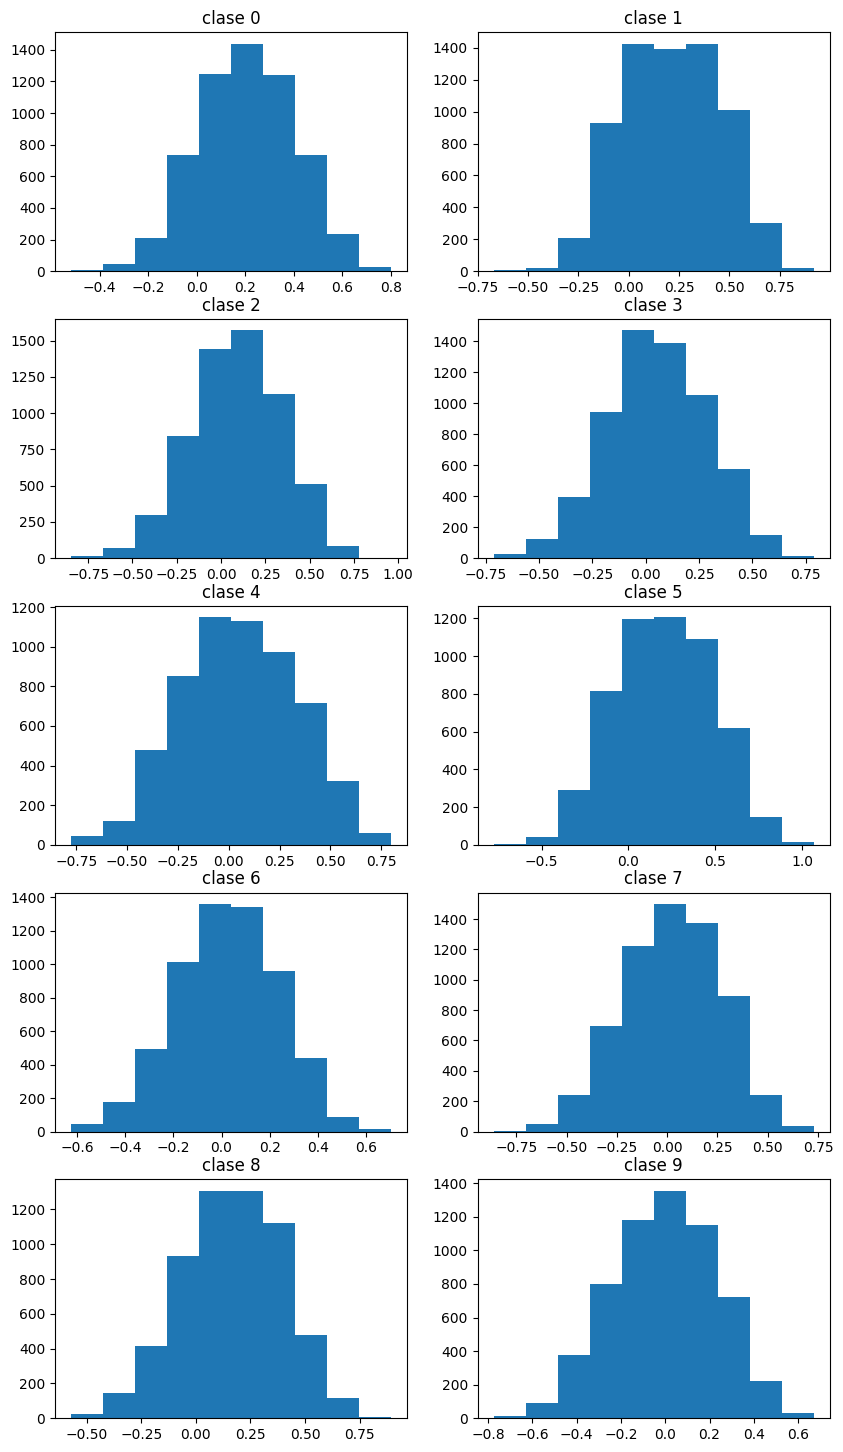

In [7]:
plt.figure(figsize=(10,18))

for i in range(10):
    plt.subplot(5,2,i+1)
    plt.hist(train_morpho_original["slant"][train_labels==i])
    plt.title("clase "+str(i))
plt.show()

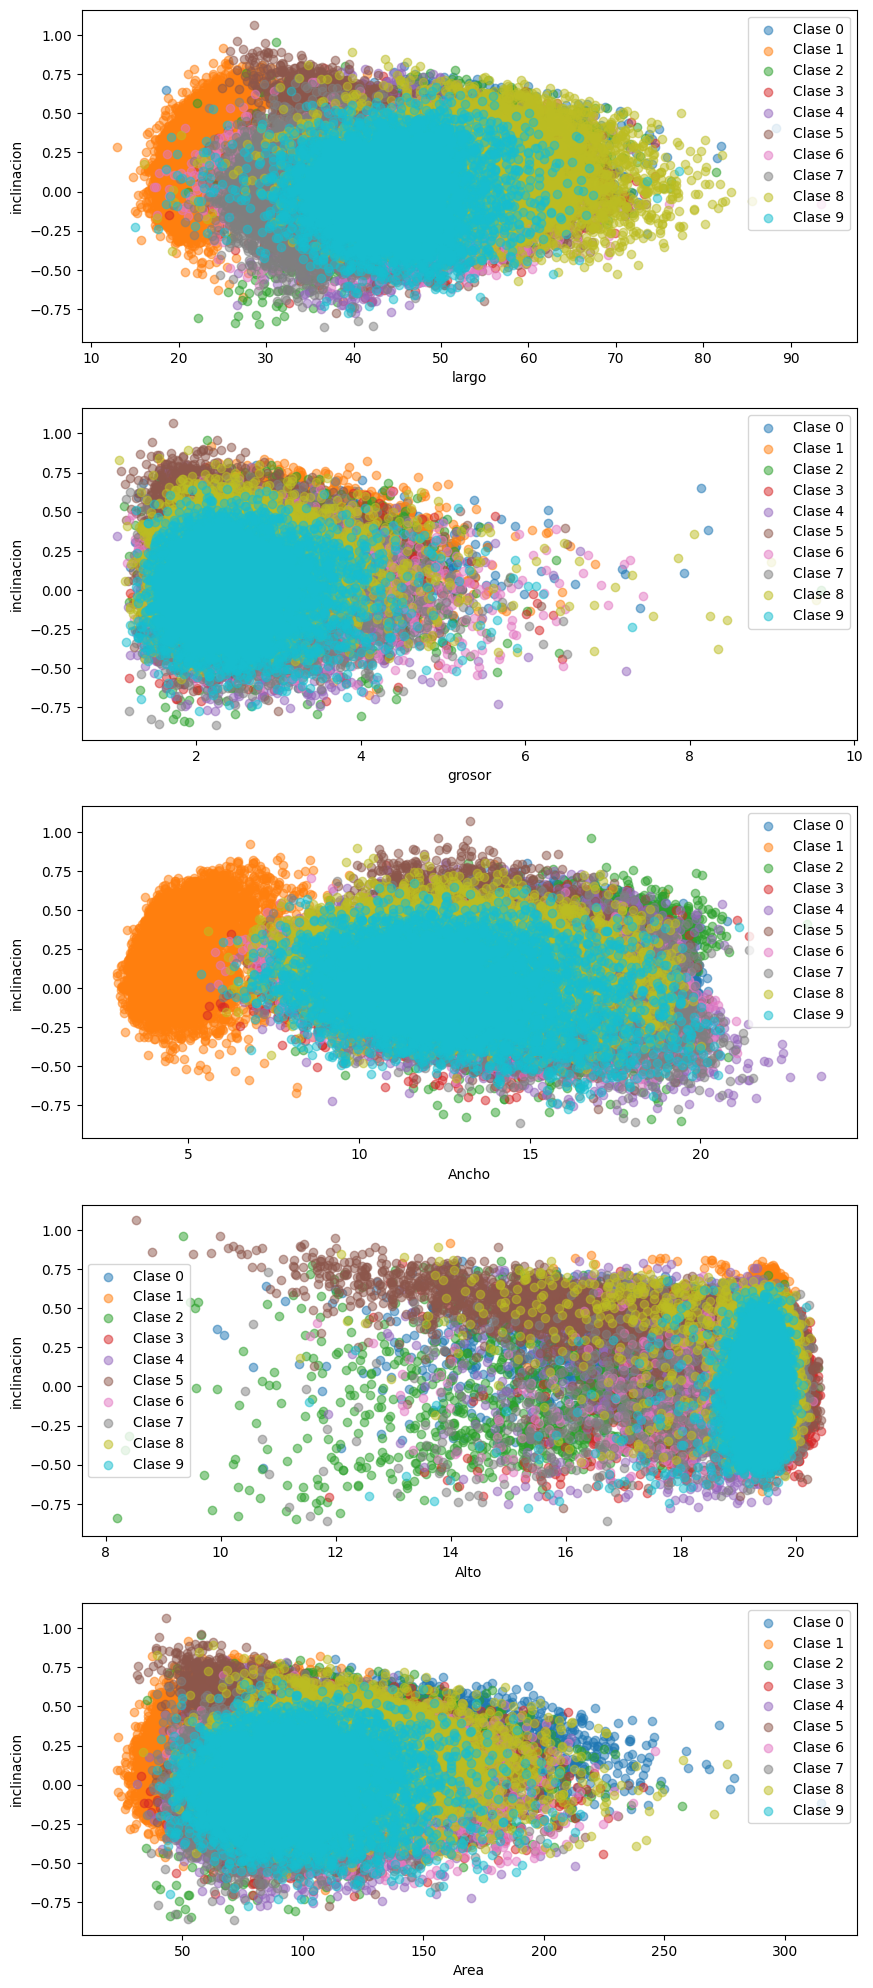

In [32]:
def plot_scatter(dataframe): 
  plt.figure(figsize=(10,25))
  for i in range(10):
    plt.subplot(5,1,1)
    plt.scatter(x=dataframe["length"][train_labels==i], 
                y=dataframe["slant"][train_labels==i],  
                color="C"+str(i), label="Clase "+str(i),
                alpha=0.5)
    plt.legend()
    plt.xlabel("largo")
    plt.ylabel("inclinacion")

  for i in range(10):
    plt.subplot(5,1,2)
    plt.scatter(x=dataframe["thickness"][train_labels==i], 
                y=dataframe["slant"][train_labels==i], 
                color="C"+str(i), label="Clase "+str(i),
                alpha=0.5)
    plt.legend()
    plt.xlabel("grosor")
    plt.ylabel("inclinacion")

  for i in range(10):
    plt.subplot(5,1,3)
    plt.scatter(x=dataframe["width"][train_labels==i], 
                y=dataframe["slant"][train_labels==i], 
                color="C"+str(i), label="Clase "+str(i),
                alpha=0.5)
    plt.legend()
    plt.xlabel("Ancho")
    plt.ylabel("inclinacion")

  for i in range(10):
    plt.subplot(5,1,4)
    plt.scatter(x=dataframe["height"][train_labels==i], 
                y=dataframe["slant"][train_labels==i], 
                color="C"+str(i), label="Clase "+str(i),
                alpha=0.5)
    plt.legend()
    plt.xlabel("Alto")
    plt.ylabel("inclinacion")

  for i in range(10):
    plt.subplot(5,1,5)
    plt.scatter(x=dataframe["area"][train_labels==i],
                y=dataframe["slant"][train_labels==i], 
                color="C"+str(i), label="Clase "+str(i),
                alpha=0.5)
    plt.legend()
    plt.xlabel("Area")
    plt.ylabel("inclinacion")
    
  plt.show()

plot_scatter(train_morpho_original)

In [53]:
print("train means: \n", train_morpho_original.mean())
print("train std var: \n", train_morpho_original.std())

train means: 
 index        29999.500000
area           103.084953
length          43.346860
thickness        2.635180
slant            0.102871
width           13.073770
height          19.106516
dtype: float64
train std var: 
 index        17320.652413
area            34.221830
length          11.371704
thickness        0.685736
slant            0.253964
width            3.908851
height           1.166468
dtype: float64


# Preprocesamiento

In [6]:
from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler
scaler = StandardScaler()

# Normalize the dataframe
train_morpho = scaler.fit_transform(train_morpho_original)
test_morpho = scaler.fit_transform(test_morpho_original)

# Normalize images
train_data= train_data/max(train_data.flatten())
test_data= test_data/max(test_data.flatten())

In [7]:
train_morpho

array([[-1.73202194,  0.12353466,  0.60850173, ...,  0.50481449,
         0.37499878,  0.63657492],
       [-1.73196421,  0.58925005,  0.69045851, ...,  0.9016601 ,
         0.59200499,  0.2010676 ],
       [-1.73190647, -0.72205838,  0.22695198, ..., -1.24060622,
         1.89466138,  0.007171  ],
       ...,
       [ 1.73190647, -0.46819784,  0.10350368, ...,  0.60998424,
         0.27111274,  0.82654615],
       [ 1.73196421, -0.60882562,  0.87856621, ...,  0.81707432,
         0.5572507 ,  0.50277031],
       [ 1.73202194, -0.53577223,  1.19766613, ...,  1.91328093,
         0.08741528, -1.06012558]])

In [8]:
print("Vector de medias:", train_morpho.mean(axis=0))
print("Vector de desvios:", train_morpho.std(axis=0))

Vector de medias: [ 0.00000000e+00  4.64221254e-17  8.85809944e-17 -4.28220422e-16
  3.78956126e-18 -7.95807864e-17 -1.92320234e-16]
Vector de desvios: [1. 1. 1. 1. 1. 1. 1.]


# (a) Predictor con imagen 

Se probaron varios modelos verificando su comportamiento con un set de validation. Una vez elegido el más acorde se entreno con el total de los datos de train y se midio su desepeño con el dataset de test. 

##Prueba del modelo


In [62]:
def imageModel():
  model=keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28,28))) 
  model.add(keras.layers.BatchNormalization())

  model.add(keras.layers.Dense(512, activation="relu"))
  model.add(keras.layers.BatchNormalization()) 

  model.add(keras.layers.Dense(128, activation="relu"))
  model.add(keras.layers.BatchNormalization()) 

  model.add(keras.layers.Dense(1, activation='linear'))

  return model

In [99]:
model=imageModel()

model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3), 
              loss='mae', metrics=['mae'])

earlyStop = keras.callbacks.EarlyStopping(monitor='mae',
                                        min_delta=0.001,
                                        patience=10)

reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='mae', factor=0.1,
                              patience=3, min_lr=1e-6, min_delta=0.01)

history=model.fit(x=train_data, y=train_morpho[:,4], batch_size=128, 
                  epochs=10, validation_split=0.3, 
                  callbacks=[earlyStop,reduce_lr])

Epoch 1/15
329/329 [==============================] - 11s 28ms/step - loss: 0.2401 - mae: 0.2401 - val_loss: 0.1336 - val_mae: 0.1336 - lr: 0.0010
Epoch 2/15
329/329 [==============================] - 14s 42ms/step - loss: 0.1309 - mae: 0.1309 - val_loss: 0.1080 - val_mae: 0.1080 - lr: 0.0010
Epoch 3/15
329/329 [==============================] - 8s 23ms/step - loss: 0.1153 - mae: 0.1153 - val_loss: 0.1171 - val_mae: 0.1171 - lr: 0.0010
Epoch 4/15
329/329 [==============================] - 9s 28ms/step - loss: 0.1118 - mae: 0.1118 - val_loss: 0.1076 - val_mae: 0.1076 - lr: 0.0010
Epoch 5/15
329/329 [==============================] - 8s 23ms/step - loss: 0.1093 - mae: 0.1093 - val_loss: 0.0638 - val_mae: 0.0638 - lr: 0.0010
Epoch 6/15
329/329 [==============================] - 9s 28ms/step - loss: 0.1039 - mae: 0.1039 - val_loss: 0.0756 - val_mae: 0.0756 - lr: 0.0010
Epoch 7/15
329/329 [==============================] - 8s 25ms/step - loss: 0.0976 - mae: 0.0976 - val_loss: 0.0807 - val_m

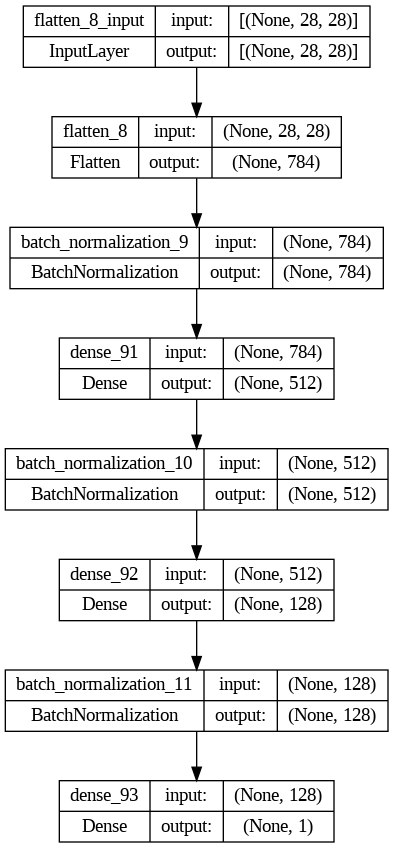

In [65]:
keras.utils.plot_model(model, "a_model.png", show_shapes=True)

MAE validation: 0.028240257874131203


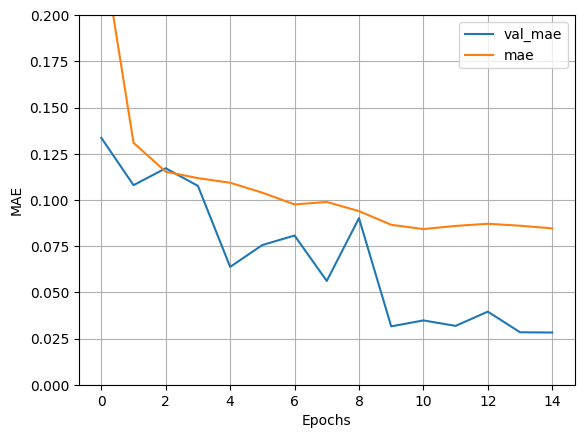

In [100]:
print("MAE validation:", history.history['val_mae'][-1])
plt.plot(history.history['val_mae'], label="val_mae")
plt.plot(history.history['mae'], label="mae")
plt.ylabel("MAE"); plt.xlabel("Epochs")
plt.ylim(0,0.2); plt.grid(); plt.legend()
plt.show()

In [101]:
print("Evaluate on test data")
results = model.evaluate(test_data, test_morpho[:,4], batch_size=128)
print("test loss, test mae:", results)

Evaluate on test data
79/79 [==============================] - 1s 6ms/step - loss: 0.0663 - mae: 0.0663
test loss, test mae: [0.06626094877719879, 0.06626094877719879]


## Entrenamiento con dataset completo

In [102]:
a_fullmodel=imageModel()

a_fullmodel.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3), 
              loss='mae', metrics=['mae'])

history=a_fullmodel.fit(x=train_data, y=train_morpho[:,4], batch_size=128, 
                  epochs=15, validation_split=0, 
                  callbacks=[earlyStop,reduce_lr])

Epoch 1/15
469/469 [==============================] - 12s 20ms/step - loss: 0.2151 - mae: 0.2151 - lr: 0.0010
Epoch 2/15
469/469 [==============================] - 11s 23ms/step - loss: 0.1152 - mae: 0.1152 - lr: 0.0010
Epoch 3/15
469/469 [==============================] - 11s 24ms/step - loss: 0.1066 - mae: 0.1066 - lr: 0.0010
Epoch 4/15
469/469 [==============================] - 11s 23ms/step - loss: 0.1053 - mae: 0.1053 - lr: 0.0010
Epoch 5/15
469/469 [==============================] - 9s 19ms/step - loss: 0.1025 - mae: 0.1025 - lr: 0.0010
Epoch 6/15
469/469 [==============================] - 11s 23ms/step - loss: 0.0938 - mae: 0.0938 - lr: 0.0010
Epoch 7/15
469/469 [==============================] - 11s 23ms/step - loss: 0.0940 - mae: 0.0940 - lr: 0.0010
Epoch 8/15
469/469 [==============================] - 10s 21ms/step - loss: 0.0957 - mae: 0.0957 - lr: 0.0010
Epoch 9/15
469/469 [==============================] - 9s 20ms/step - loss: 0.0894 - mae: 0.0894 - lr: 1.0000e-04
Epoch 10

In [103]:
print("Evaluate on test data")
results = a_fullmodel.evaluate(test_data, test_morpho[:,4], batch_size=128)
print("test loss, test mae:", results)

Evaluate on test data
79/79 [==============================] - 1s 6ms/step - loss: 0.0609 - mae: 0.0609
test loss, test mae: [0.06092341989278793, 0.06092341989278793]


In [104]:
model.save("a_fullfitted_model.h5")

## Pruebas(Borrar)

In [90]:
#0.07
def testModel():

  model=keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28,28))) 
  model.add(keras.layers.BatchNormalization())

  model.add(keras.layers.Dense(512, activation="relu"))
  model.add(keras.layers.BatchNormalization()) 

  model.add(keras.layers.Dense(128, activation="relu"))
  model.add(keras.layers.BatchNormalization()) 

  model.add(keras.layers.Dense(1, activation='linear'))

  return model

In [92]:
model=testModel()

model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3), 
              loss='mae', metrics=['mae'])

earlyStop = keras.callbacks.EarlyStopping(monitor='mae',
                                        min_delta=0.001,
                                        patience=10)

reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='mae', factor=0.1,
                              patience=3, min_lr=1e-6, min_delta=0.01)

history=model.fit(x=train_data, y=train_morpho[:,4], batch_size=128, 
                  epochs=15, validation_split=0.3, 
                  callbacks=[earlyStop,reduce_lr])

Epoch 1/15
329/329 [==============================] - 11s 23ms/step - loss: 0.2378 - mae: 0.2378 - val_loss: 0.1379 - val_mae: 0.1379 - lr: 0.0010
Epoch 2/15
329/329 [==============================] - 8s 25ms/step - loss: 0.1266 - mae: 0.1266 - val_loss: 0.1035 - val_mae: 0.1035 - lr: 0.0010
Epoch 3/15
329/329 [==============================] - 8s 24ms/step - loss: 0.1118 - mae: 0.1118 - val_loss: 0.0856 - val_mae: 0.0856 - lr: 0.0010
Epoch 4/15
329/329 [==============================] - 9s 26ms/step - loss: 0.1062 - mae: 0.1062 - val_loss: 0.1278 - val_mae: 0.1278 - lr: 0.0010
Epoch 5/15
329/329 [==============================] - 9s 27ms/step - loss: 0.1038 - mae: 0.1038 - val_loss: 0.1227 - val_mae: 0.1227 - lr: 0.0010
Epoch 6/15
329/329 [==============================] - 8s 23ms/step - loss: 0.1021 - mae: 0.1021 - val_loss: 0.0649 - val_mae: 0.0649 - lr: 0.0010
Epoch 7/15
329/329 [==============================] - 9s 28ms/step - loss: 0.0874 - mae: 0.0874 - val_loss: 0.0367 - val_ma

MAE validation: 0.03108498454093933


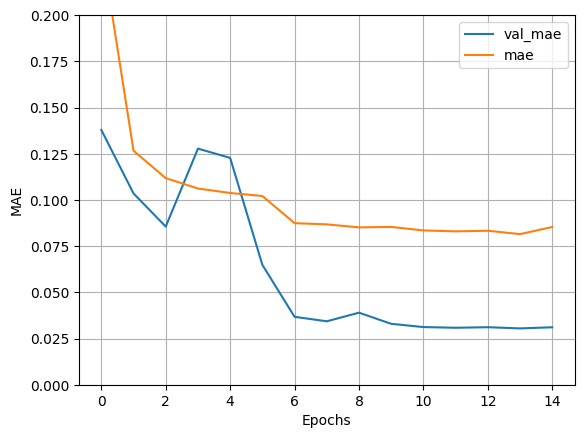

In [93]:
print("MAE validation:", history.history['val_mae'][-1])
plt.plot(history.history['val_mae'], label="val_mae")
plt.plot(history.history['mae'], label="mae")
plt.ylabel("MAE"); plt.xlabel("Epochs")
plt.ylim(0,0.2); plt.grid(); plt.legend()
plt.show()

In [94]:
print("Evaluate on test data")
results = model.evaluate(test_data, test_morpho[:,4], batch_size=128)
print("test loss, test mae:", results)

Evaluate on test data
79/79 [==============================] - 1s 7ms/step - loss: 0.0621 - mae: 0.0621
test loss, test mae: [0.062067463994026184, 0.062067463994026184]


In [96]:
test_fullmodel=testModel()

test_fullmodel.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3), 
              loss='mae', metrics=['mae'])

history=test_fullmodel.fit(x=train_data, y=train_morpho[:,4], batch_size=128, 
                  epochs=14, validation_split=0, 
                  callbacks=[earlyStop,reduce_lr])

Epoch 1/14
469/469 [==============================] - 11s 20ms/step - loss: 0.2026 - mae: 0.2026 - lr: 0.0010
Epoch 2/14
469/469 [==============================] - 10s 22ms/step - loss: 0.1139 - mae: 0.1139 - lr: 0.0010
Epoch 3/14
469/469 [==============================] - 11s 23ms/step - loss: 0.1069 - mae: 0.1069 - lr: 0.0010
Epoch 4/14
469/469 [==============================] - 11s 23ms/step - loss: 0.1045 - mae: 0.1045 - lr: 0.0010
Epoch 5/14
469/469 [==============================] - 9s 19ms/step - loss: 0.0976 - mae: 0.0976 - lr: 0.0010
Epoch 6/14
469/469 [==============================] - 11s 23ms/step - loss: 0.0981 - mae: 0.0981 - lr: 0.0010
Epoch 7/14
469/469 [==============================] - 11s 22ms/step - loss: 0.0970 - mae: 0.0970 - lr: 0.0010
Epoch 8/14
469/469 [==============================] - 10s 21ms/step - loss: 0.0975 - mae: 0.0975 - lr: 0.0010
Epoch 9/14
469/469 [==============================] - 10s 21ms/step - loss: 0.0823 - mae: 0.0823 - lr: 1.0000e-04
Epoch 1

In [97]:
print("Evaluate on test data")
results = test_fullmodel.evaluate(test_data, test_morpho[:,4], batch_size=128)
print("test loss, test mae:", results)

Evaluate on test data
79/79 [==============================] - 1s 7ms/step - loss: 0.0554 - mae: 0.0554
test loss, test mae: [0.05540972203016281, 0.05540972203016281]


# (b) Predictor con imagen y label

##Modelo

In [40]:
def labModel():
  # Entradas
  inputImage = keras.layers.Input(shape=(28,28))
  inputLab = keras.layers.Input(shape=(1,))

  # Subred de imagenes
  x = keras.layers.Flatten(input_shape=(28,28))(inputImage)
  x = keras.layers.Dense(256, activation="relu")(x)
  x = keras.layers.Dense(128, activation="relu")(x)
  x = keras.layers.BatchNormalization()(x)
  x = keras.Model(inputs=inputImage, outputs=x)

  # Subred de label
  y = keras.layers.Embedding(input_dim=10, output_dim=2, input_length=1)(inputLab)
  y = keras.layers.Flatten(input_shape=(2,))(y)
  y = keras.layers.Dense(64, activation="relu")(y)
  y = keras.layers.Dense(32, activation="relu")(y)
  y = keras.layers.Dense(4, activation="relu")(y)
  y = keras.layers.BatchNormalization()(y)
  y = keras.Model(inputs=inputLab, outputs=y)

  # "anexo" las aristas
  combined = keras.layers.concatenate([x.output, y.output])

  # Creo las capas compartidas
  z = keras.layers.Dropout(0.1)(combined)
  z = keras.layers.Dense(256, activation="relu")(z)
  z = keras.layers.Dense(1, activation="linear")(z)

  # Defino el modelo general
  lab_model = keras.Model(inputs=[x.input, y.input], outputs=z)
  return lab_model

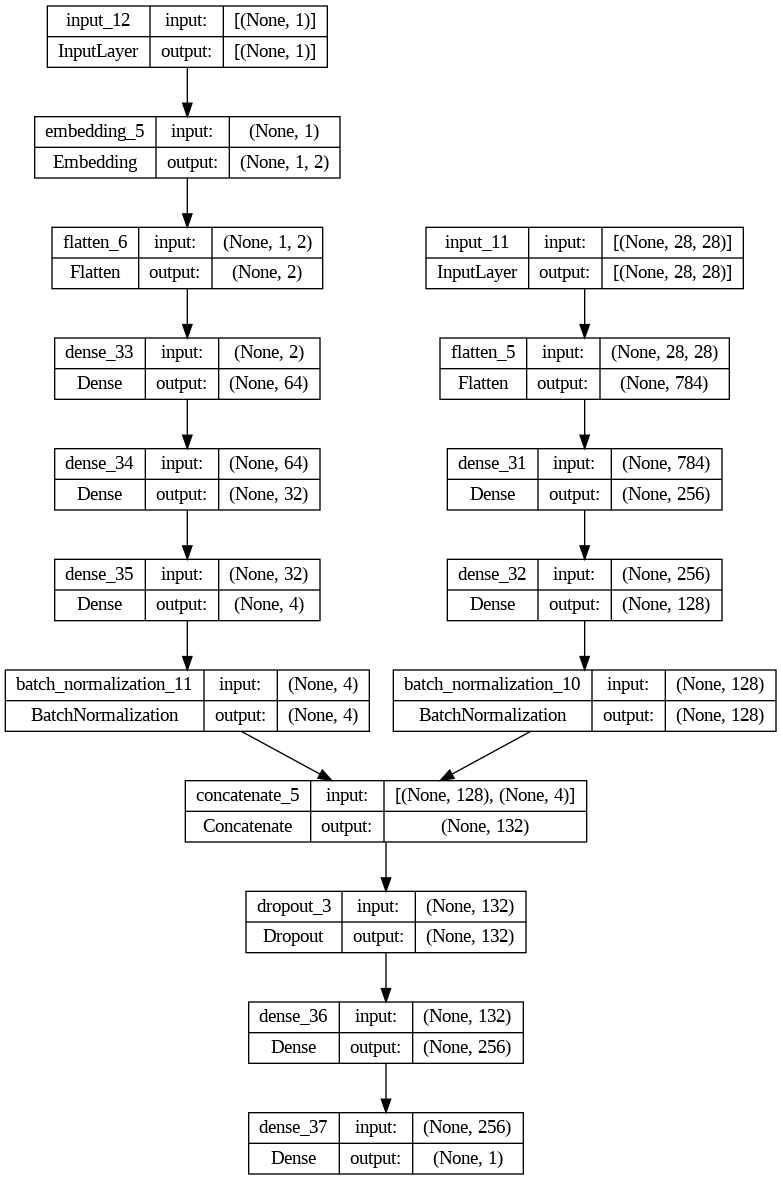

In [41]:
keras.utils.plot_model(labModel(), "b_model.png", show_shapes=True)

## Compilación y fit

In [42]:
lab_model=labModel()

lab_model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3), 
              loss='mae', metrics=['mae'])

earlyStop = keras.callbacks.EarlyStopping(monitor='mae',
                                        min_delta=0.001,
                                        patience=10)

reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='mae', factor=0.1,
                              patience=3, min_lr=1e-6, min_delta=0.01)

lab_history=lab_model.fit(x=[train_data, train_labels], y=train_morpho[:,4], batch_size=128, 
                  epochs=15, validation_split=0.3, 
                  callbacks=[earlyStop,reduce_lr])

Epoch 1/20
329/329 [==============================] - 8s 17ms/step - loss: 0.2021 - mae: 0.2021 - val_loss: 0.1491 - val_mae: 0.1491 - lr: 0.0010
Epoch 2/20
329/329 [==============================] - 5s 14ms/step - loss: 0.1345 - mae: 0.1345 - val_loss: 0.0790 - val_mae: 0.0790 - lr: 0.0010
Epoch 3/20
329/329 [==============================] - 5s 16ms/step - loss: 0.1166 - mae: 0.1166 - val_loss: 0.1325 - val_mae: 0.1325 - lr: 0.0010
Epoch 4/20
329/329 [==============================] - 5s 14ms/step - loss: 0.1081 - mae: 0.1081 - val_loss: 0.0590 - val_mae: 0.0590 - lr: 0.0010
Epoch 5/20
329/329 [==============================] - 4s 14ms/step - loss: 0.1072 - mae: 0.1072 - val_loss: 0.1263 - val_mae: 0.1263 - lr: 0.0010
Epoch 6/20
329/329 [==============================] - 5s 17ms/step - loss: 0.0970 - mae: 0.0970 - val_loss: 0.4191 - val_mae: 0.4191 - lr: 0.0010
Epoch 7/20
329/329 [==============================] - 4s 13ms/step - loss: 0.0919 - mae: 0.0919 - val_loss: 0.1012 - val_mae

MAE validation: 0.026867620646953583


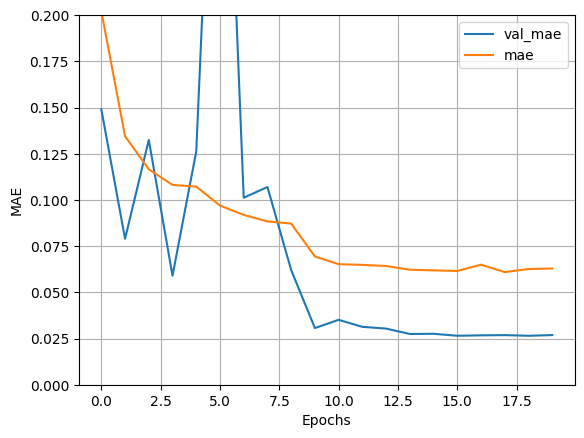

In [43]:
print("MAE validation:", lab_history.history['val_mae'][-1])
plt.plot(lab_history.history['val_mae'], label="val_mae")
plt.plot(lab_history.history['mae'], label="mae")
plt.ylabel("MAE"); plt.xlabel("Epochs")
plt.ylim(0,0.2); plt.grid(); plt.legend()
plt.show()

## Testeo

In [44]:
print("Evaluate on test data")
results = lab_model.evaluate([test_data, test_labels], test_morpho[:,4], batch_size=32)
print("test loss, test mae:", results)

Evaluate on test data
79/79 [==============================] - 0s 6ms/step - loss: 0.0658 - mae: 0.0658
test loss, test mae: [0.06575455516576767, 0.06575455516576767]


## Embeddings obtenidos

In [51]:
submodel = keras.Model(inputs=lab_model.input[1], 
                       outputs=lab_model.get_layer('flatten_8').output)

test_labels=np.arange(10)
embeddings=submodel.predict(test_labels)

print("Valores embedding:")
print(embeddings)

1/1 [==============================] - 0s 49ms/step
Valores embedding:
[[ 0.03206725  0.00048552]
 [-0.01887566  0.0166453 ]
 [ 0.04370553  0.03074659]
 [-0.03684928 -0.02030516]
 [ 0.00284116  0.02687016]
 [-0.00305058 -0.00946214]
 [ 0.03320644  0.01240499]
 [-0.00739641  0.03056285]
 [ 0.02654457  0.03781156]
 [-0.0229039  -0.00752165]]


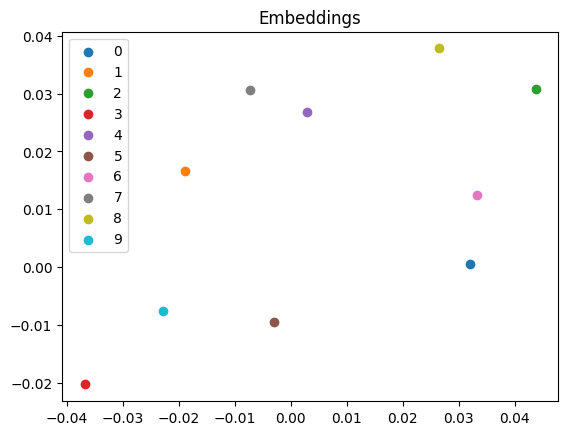

In [59]:
def plot_embeddings(vectors):
  for i in range(len(vectors)):
    plt.scatter(x=vectors[i][0], y=vectors[i][1], label=str(i))
  
  plt.title("Embeddings")
  plt.legend()
  plt.show()

plot_embeddings(embeddings)

Analizando el scatter graficado podemos apreciar que aquellos números que son gráficamente similares se mappearon en vectores que efectivamente se encuentran cercanos entre ellos. 

Por ejemplo el 6 y el 0 tienen una semejanza alta si uno observa las fotos y en el scatter se encuentran cercanos entre sí. El 3, en cambio, es se encuentra más alejado de todo el resto ya que es quien menos similitudes representa. 

# (c) Predictor con imagen y Variable a elección

Para este modelo se eligió el **largo** como variable adicional, ya que se vió en el EDA que las categorías parecían **más simples de separar** que en otras variables.

## Modelo

In [48]:
def varModel():
  # Entradas
  inputImage = keras.layers.Input(shape=(28,28))
  inputVar = keras.layers.Input(shape=(1,))

  # Subred de imagenes
  x = keras.layers.Flatten(input_shape=(28,28))(inputImage)
  x = keras.layers.Dense(256, activation="relu")(x)
  x = keras.layers.Dense(128, activation="relu")(x)
  x = keras.layers.BatchNormalization()(x)
  x = keras.Model(inputs=inputImage, outputs=x)

  # Subred de var
  y = keras.layers.Dense(64, activation="relu")(inputVar)
  y = keras.layers.Dense(32, activation="relu")(y)
  y = keras.layers.Dense(4, activation="relu")(y)
  y = keras.layers.BatchNormalization()(y)
  y = keras.Model(inputs=inputVar, outputs=y)

  # "anexo" las aristas
  combined = keras.layers.concatenate([x.output, y.output])

  # Creo las capas compartidas
  z = keras.layers.Dropout(0.1)(combined)
  z = keras.layers.Dense(256, activation="relu")(z)
  z = keras.layers.Dense(1, activation="linear")(z)

  # Defino el modelo general
  var_model = keras.Model(inputs=[x.input, y.input], outputs=z)
  return var_model

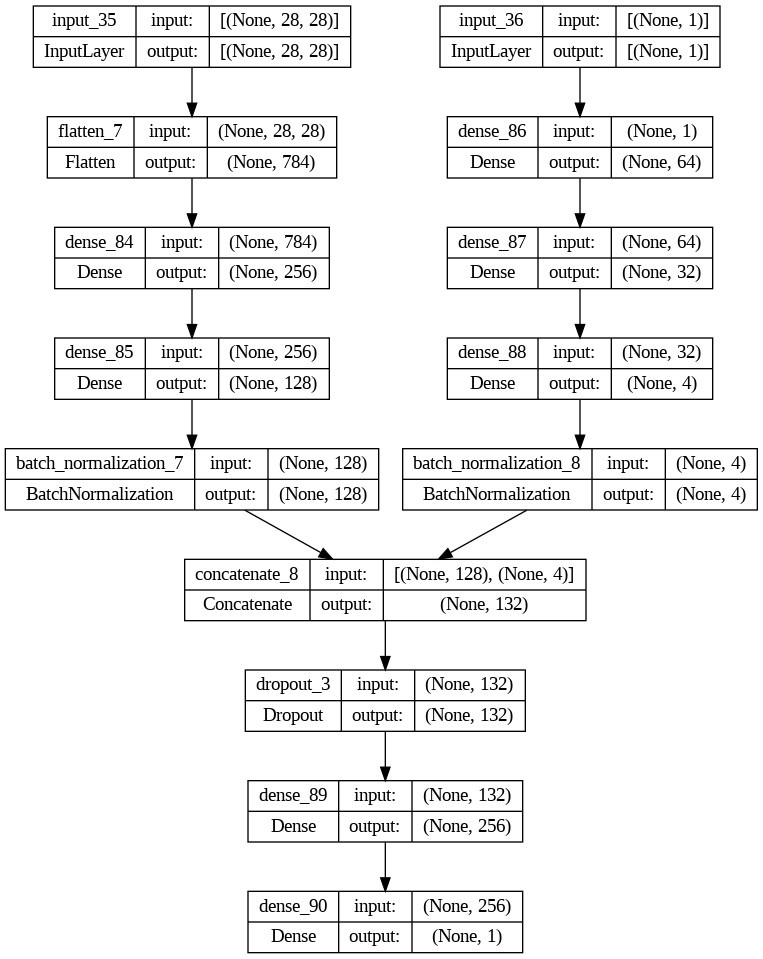

In [61]:
keras.utils.plot_model(var_model, "c_model.png", show_shapes=True)

## Compilación y fit

In [53]:
selected_var=2

var_model = varModel()

var_model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3), 
              loss='mae', metrics=['mae'])

earlyStop = keras.callbacks.EarlyStopping(monitor='mae',
                                        min_delta=0.001,
                                        patience=10)

reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='mae', factor=0.1,
                              patience=3, min_lr=1e-6, min_delta=0.01)

var_history=var_model.fit(x=[train_data,train_morpho[:,selected_var]], 
                          y=train_morpho[:,4], batch_size=32, epochs=15, 
                          validation_split=0.3, callbacks=[earlyStop,reduce_lr])

Epoch 1/15
1313/1313 [==============================] - 13s 9ms/step - loss: 0.2203 - mae: 0.2203 - val_loss: 0.1619 - val_mae: 0.1619 - lr: 0.0010
Epoch 2/15
1313/1313 [==============================] - 10s 7ms/step - loss: 0.1470 - mae: 0.1470 - val_loss: 0.1017 - val_mae: 0.1017 - lr: 0.0010
Epoch 3/15
1313/1313 [==============================] - 12s 9ms/step - loss: 0.1209 - mae: 0.1209 - val_loss: 0.0704 - val_mae: 0.0704 - lr: 0.0010
Epoch 4/15
1313/1313 [==============================] - 11s 9ms/step - loss: 0.1019 - mae: 0.1019 - val_loss: 0.0619 - val_mae: 0.0619 - lr: 0.0010
Epoch 5/15
1313/1313 [==============================] - 11s 8ms/step - loss: 0.0920 - mae: 0.0920 - val_loss: 0.0553 - val_mae: 0.0553 - lr: 0.0010
Epoch 6/15
1313/1313 [==============================] - 11s 8ms/step - loss: 0.0818 - mae: 0.0818 - val_loss: 0.0503 - val_mae: 0.0503 - lr: 0.0010
Epoch 7/15
1313/1313 [==============================] - 11s 8ms/step - loss: 0.0757 - mae: 0.0757 - val_loss: 0.

MAE validation: 0.02468598261475563


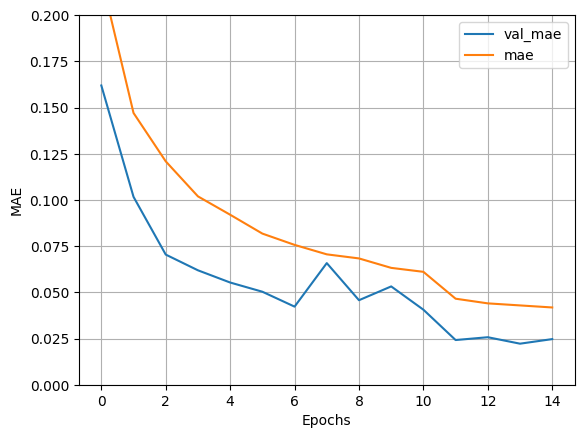

In [56]:
print("MAE validation:", var_history.history['val_mae'][-1])
plt.plot(var_history.history['val_mae'], label="val_mae")
plt.plot(var_history.history['mae'], label="mae")
plt.ylabel("MAE"); plt.xlabel("Epochs")
plt.ylim(0,0.2); plt.grid(); plt.legend()
plt.show()

##Testeo y guardado

In [57]:
print("Evaluate on test data")
results = var_model.evaluate([test_data, test_morpho[:,selected_var]], test_morpho[:,4], batch_size=128)
print("test loss, test mae:", results)

Evaluate on test data
79/79 [==============================] - 0s 4ms/step - loss: 0.0570 - mae: 0.0570
test loss, test mae: [0.05704228952527046, 0.05704228952527046]


In [60]:
var_model.save("c_model.h5")